<a href="https://colab.research.google.com/github/Ruchira507/Global-Terrorism-Analysis/blob/main/Ruchira_Shrawagi_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [ ]:
# Mounting csv file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/EDA project/'

In [ ]:
#Loading the dataset
df = pd.read_csv(path + 'Global Terrorism Data.csv', encoding = 'latin-1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.eventid.value_counts()

197000000001    1
201309100037    1
201309110023    1
201309110024    1
201309110026    1
               ..
199510030007    1
199510030008    1
199510030009    1
199510040001    1
201712310032    1
Name: eventid, Length: 181691, dtype: int64

In [ ]:
#Rename some columns name properly
df.rename (columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'Country':'Countrycode', 'country_txt':'Country'}, inplace=True)


In [ ]:
# Create DataFrame with necessary columns
df = df[['Year', 'Month', 'Day', 'Country', 'provstate', 'region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'target1', 'nkill', 'nwound', 'summary', 'gname', 'targtype1_txt', 'weaptype1_txt', 'motive']]

In [ ]:
# Extract new data with neccessary columns 
df.head()

Year  Month  Day             Country provstate  \
0  1970      7    2  Dominican Republic  Baghadad   
1  1970      0    0              Mexico   Federal   
2  1970      1    0         Philippines    Tarlac   
3  1970      1    0              Greece    Attica   
4  1970      1    0               Japan   Fukouka   

                    region_txt           city   latitude   longitude  \
0  Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                North America    Mexico city  19.371887  -99.086624   
2               Southeast Asia        Unknown  15.478598  120.599741   
3               Western Europe         Athens  37.997490   23.762728   
4                    East Asia        Fukouka  33.580412  130.396361   

                  attacktype1_txt                  target1  nkill  nwound  \
0                   Assassination             Julio Guzman    1.0     0.0   
1     Hostage Taking (Kidnapping)  Nadine Chaval, daughter    0.0     0.0   
2                   Assassination                 Employee    1.0     0.0   
3               Bombing/Explosion             U.S. Embassy    0.0     0.0   
4  Facility/Infrastructure Attack           U.S. Consulate    0.0     0.0   

  summary                               gname                targtype1_txt  \
0     NaN                              MANO-D  Private Citizens & Property   
1     NaN  23rd of September Communist League      Government (Diplomatic)   
2     NaN                             Unknown          Journalists & Media   
3     NaN                             Unknown      Government (Diplomatic)   
4     NaN                             Unknown      Government (Diplomatic)   

  weaptype1_txt   motive  
0       Unknown  unknown  
1       Unknown  unknown  
2       Unknown  unknown  
3    Explosives  unknown  
4    Incendiary  unknown

In [ ]:
df.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean     2002.638997       6.467277      15.505644      23.744214   
std        13.259430       3.388303       8.814045      18.398930   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.849620   
50%      2009.000000       6.000000      15.000000      31.633078   
75%      2014.000000       9.000000      23.000000      34.538561   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude          nkill         nwound  
count  1.816910e+05  181691.000000  181691.000000  
mean  -4.460782e+02       2.266860       2.883296  
std    2.021946e+05      11.227057      34.309747  
min   -8.618590e+07       0.000000       0.000000  
25%    6.655000e+00       0.000000       0.000000  
50%    4.364658e+01       0.000000       0.000000  
75%    6.835734e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  target1          181055 non-null  object 
 11  nkill            171378 non-null  float64
 12  nwound           165380 non-null  float64
 13  summary          115562 non-null  object 
 14  gname            181691 non-null  object 
 15  targtype1_txt    181691 non-null  object 
 16  weaptype1_txt    181691 non-null  obje

In [ ]:
(df.columns)

Index(['Year', 'Month', 'Day', 'Country', 'provstate', 'region_txt', 'city',
       'latitude', 'longitude', 'attacktype1_txt', 'target1', 'nkill',
       'nwound', 'summary', 'gname', 'targtype1_txt', 'weaptype1_txt',
       'motive'],
      dtype='object')

In [ ]:
df.shape

(181691, 18)

In [ ]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Country                 0
provstate             421
region_txt              0
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
target1               636
nkill               10313
nwound              16311
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
dtype: int64

In [ ]:
df['provstate']

0                     NaN
1                 Federal
2                  Tarlac
3                  Attica
4                 Fukouka
               ...       
181686    Middle Shebelle
181687           Lattakia
181688        Maguindanao
181689            Manipur
181690        Maguindanao
Name: provstate, Length: 181691, dtype: object

In [ ]:
# Check average value of the null columns
State = df['provstate'].mode()
city = df['city'].mode()
longitude = df['longitude'].mode()
latitude = df['latitude'].mode()
target = df['target1'].mode()
kill = df['nkill'].mode()
wound = df['nwound'].mode()
summ = df['summary'].mode()
moti = df['motive'].mode()
print (State, city, longitude, latitude, target, kill, wound, summ, moti)

0    Baghdad
dtype: object 0    Unknown
dtype: object 0    44.371773
dtype: float64 0    33.303566
dtype: float64 0    Civilians
dtype: object 0    0.0
dtype: float64 0    0.0
dtype: float64 0    09/00/2016: Sometime between September 18, 201...
dtype: object 0    unknown
dtype: object


In [ ]:
# Need to fill null values, we will use maximum values from the above
df['provstate'].fillna(value = 'Baghadad', inplace = True)

In [ ]:
df['city'].fillna(value= 'unknown', inplace = True)
df['longitude'].fillna(value = 44.371773, inplace = True)
df['latitude'].fillna(value = 33.303566, inplace = True)
df['target1'].fillna (value = 'civilians', inplace = True)
df['nkill'].fillna(value = 0.0, inplace= True)
df['nwound'].fillna(value = 0.0, inplace = True)
df['motive'].fillna(value = 'unknown', inplace = True)

In [ ]:
df.info() #Now we don't have any null values into the columns except summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   provstate        181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181691 non-null  object 
 7   latitude         181691 non-null  float64
 8   longitude        181691 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  target1          181691 non-null  object 
 11  nkill            181691 non-null  float64
 12  nwound           181691 non-null  float64
 13  summary          115562 non-null  object 
 14  gname            181691 non-null  object 
 15  targtype1_txt    181691 non-null  object 
 16  weaptype1_txt    181691 non-null  obje

# ***Exploratory Data Analysis***


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44c1e674d0>,
      dtype=object)

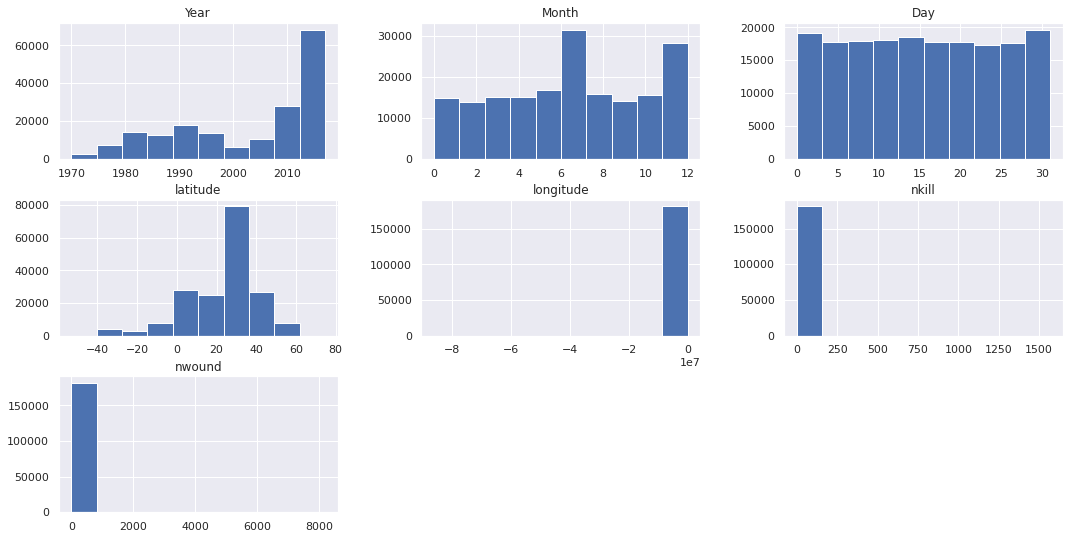

In [ ]:
# It shows the details graphical discription of the each dataset
df.hist(figsize= (18, 9)) 

## ***Univeritate Analysis***

### ***Comparing Attack type***

In [ ]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

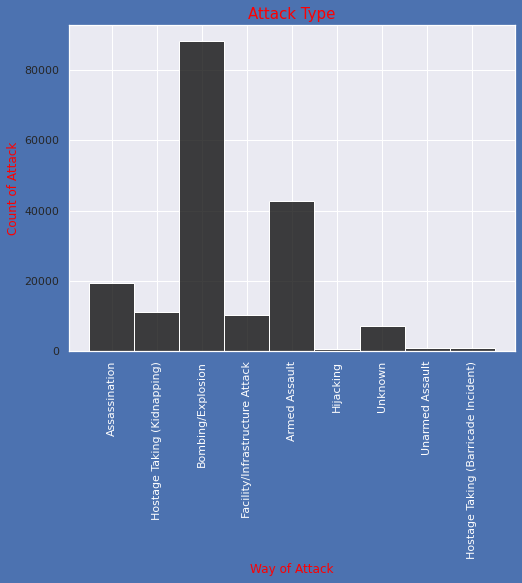

In [ ]:
plt.figure(figsize= (8, 6), facecolor = 'B')
sns.histplot(df['attacktype1_txt'], color = 'Black')
plt.title ('Attack Type', fontsize = 15, color = 'Red' )
plt.xticks(rotation = 90, color = 'White')
plt.xlabel ('Way of Attack', color = 'Red')
plt.ylabel ('Count of Attack', color = 'Red')
plt.show()

***Colcusion***: 
*   Maximum way of attack is Bombing/Explosion
*   Minimum ways of Attack is Hijackin




### ***Let's see the top 5 terrorist attack happened through which weapon type #***

In [ ]:

df.weaptype1_txt.value_counts()[:5]

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: weaptype1_txt, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


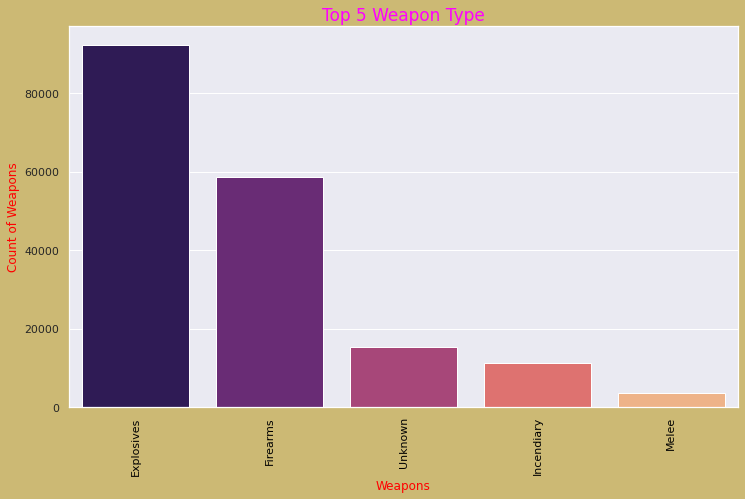

In [ ]:
plt.figure(figsize= (12, 7), facecolor = 'Y')
sns.barplot(df['weaptype1_txt'].value_counts()[:5].index,df['weaptype1_txt'].value_counts()[:5].values, palette = 'magma')
plt.title ('Top 5 Weapon Type', fontsize = 17, color = 'Magenta' )
plt.xticks(rotation = 90, color = 'Black')
plt.xlabel ('Weapons', color = 'Red')
plt.ylabel ('Count of Weapons', color = 'Red')
plt.show()

### ***Showing Latitude using Histogram***

Text(0, 0.5, 'Frequency')

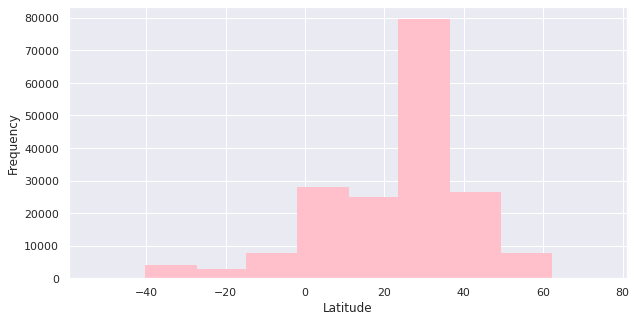

In [ ]:
plt.figure (figsize = (10, 5))
new = df[~df['latitude'].isna()]['latitude']
plt.hist(new.values, color='pink', edgecolor = 'Pink')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

### ***Terrorist Activities by region in each year using Region Chart***

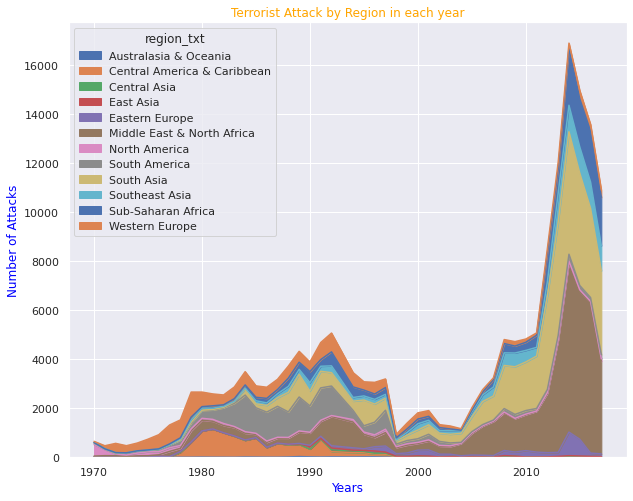

In [ ]:
pd.crosstab(df.Year, df.region_txt).plot(kind = 'area', figsize = (10, 8))
plt.title ('Terrorist Attack by Region in each year', color = 'Orange')
plt.ylabel ('Number of Attacks', color = 'Blue')
plt.xlabel ('Years', color = 'Blue')
plt.show()


### ***Number of attcks in each year***

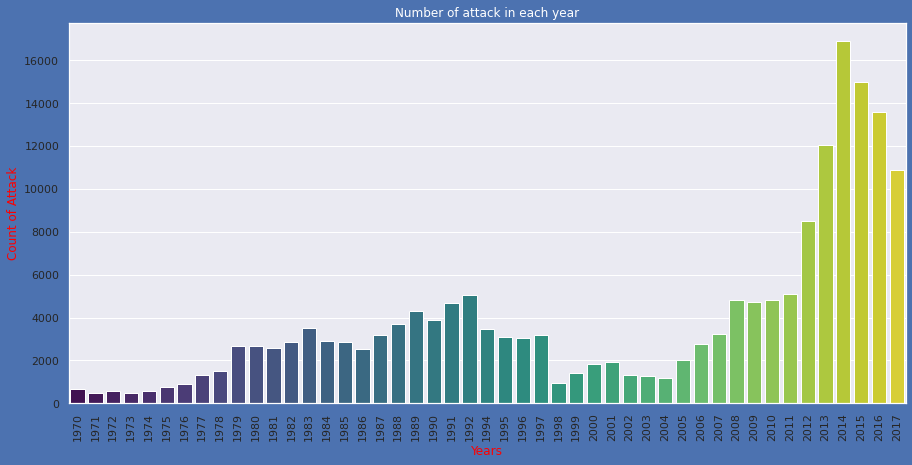

In [ ]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure (figsize = (15,7), facecolor = 'B')
sns.barplot (x = x_year, 
            y = y_count_years, 
              palette = 'viridis')
plt.xticks (rotation = 90)
plt.title ('Number of attack in each year', color = 'W')
plt.ylabel ('Count of Attack', color = 'Red')
plt.xlabel ('Years', color = 'Red')
plt.show()

2014, 2015, 2016 are the top most terrorist attack years.

### ***Terrorist Activity by City in each year***

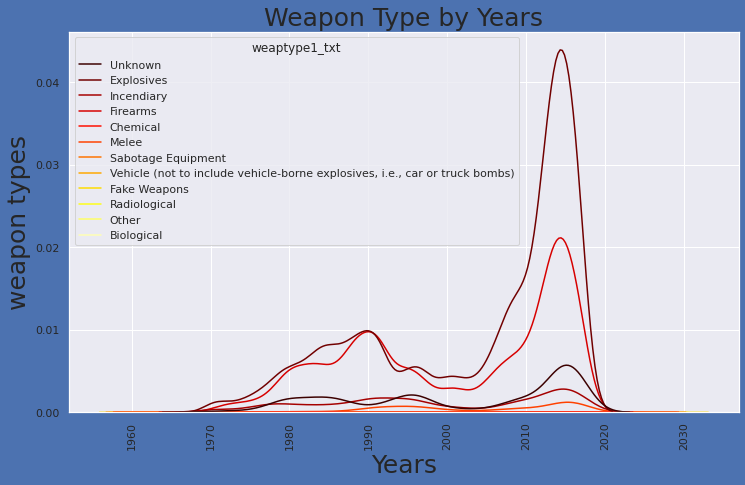

In [ ]:
plt.figure(figsize = (12,7), facecolor = 'B')
sns.kdeplot(df['Year'], hue = df['weaptype1_txt'], palette = 'hot')
plt.title('Weapon Type by Years', fontsize = 25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('weapon types',fontsize=25)
plt.xticks(rotation=90)
plt.show()

### ***Number of terrorist attack in Country and region using Bar plot***

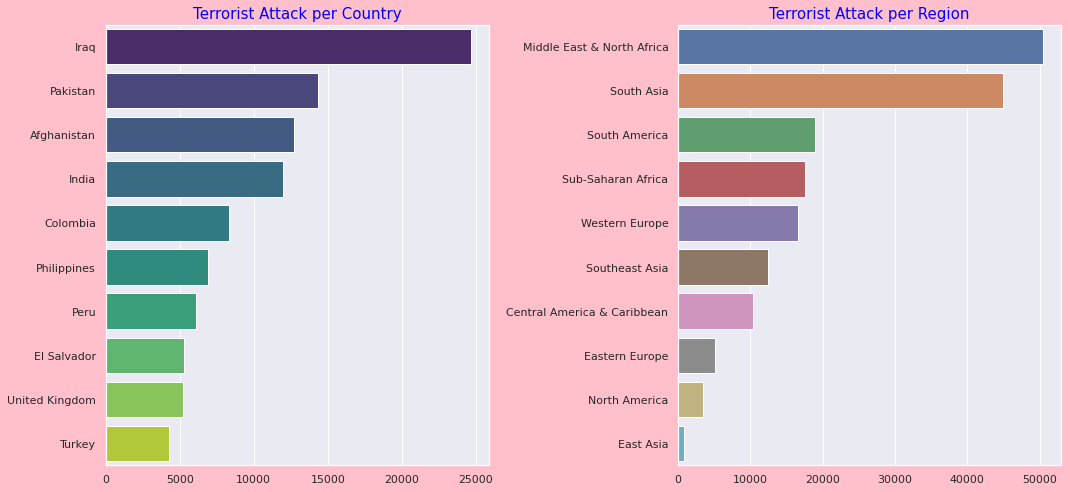

In [ ]:
fig,axes = plt.subplots (figsize = (15, 7), nrows = 1, ncols = 2, facecolor = 'Pink')
sns.barplot (x = df['Country'].value_counts()[:10].values, y = df['Country'].value_counts()[:10].index,
             ax=axes[0], palette = 'viridis')
axes[0].set_title('Terrorist Attack per Country', fontsize = 15, color = 'Blue')
sns.barplot (x = df['region_txt'].value_counts()[:10].values, y = df['region_txt'].value_counts()[:10].index,
             ax=axes[1])
axes[1].set_title('Terrorist Attack per Region', fontsize = 15, color = 'Blue')
fig.tight_layout()
plt.show()

# ***Correlation Analysis***

### ***The number of casuality corresponding to the killed people in each country for each year***

In [ ]:
px.scatter (df, df.nwound, df.nkill, hover_name = 'Country', animation_frame = 'Year', animation_group = 'Country', 
            color = 'attacktype1_txt', range_color = [0,1], labels ={'nkill':'Death', 'nwound':'casulality'},
            title = 'Casualities V/S Killed in each year')

### ***Correlation Heatmap***

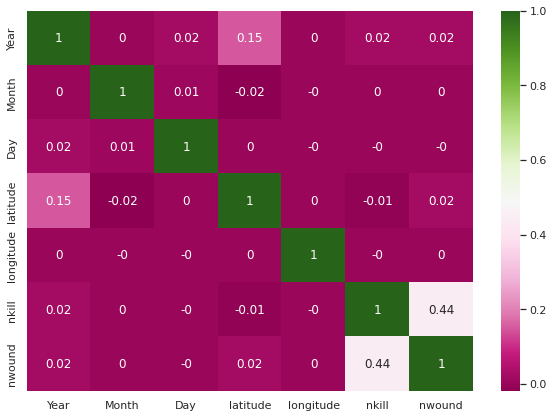

In [ ]:
plt.figure (figsize = (10,7))
sns.heatmap(np.round(df.corr(), 2), annot = True, cmap = 'PiYG')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5e8a07fd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5e8e03b610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5ea97e1390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5e8e971610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5e9231cc90>],
 'means': []}

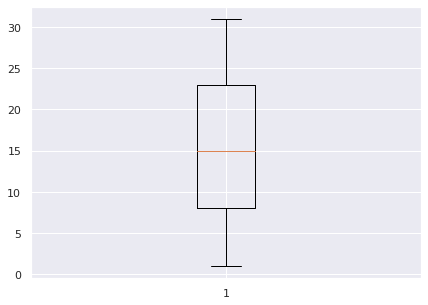

In [ ]:
plt.figure(figsize= (7,5))

plt.boxplot(df[df['Day'] != 0]['Day'] )

## ***Which Country suffered Maximum terrorist attacks and which country suffered Minimum terrorist attacks***

In [ ]:
terror = df.groupby(['Country'], as_index = False).count()

In [ ]:
max_suffer = terror['Year'].max()
max_id = terror['Year'].idxmax()
max_name = terror['Country'][max_id]
min_suffer = terror['Year'].min()
min_id = terror['Year'].idxmax()
min_name = terror['Country'][min_id]
print (max_name, 'has suffered maximum terrorist attacks', max_suffer)
print (min_name, 'has suffered minimum terrorist attack', min_suffer)

Iraq has suffered maximum terrorist attacks 24636
Iraq has suffered minimum terrorist attack 1


## ***Now lets see out of which terrorist organisation have carried out their operation in each region***

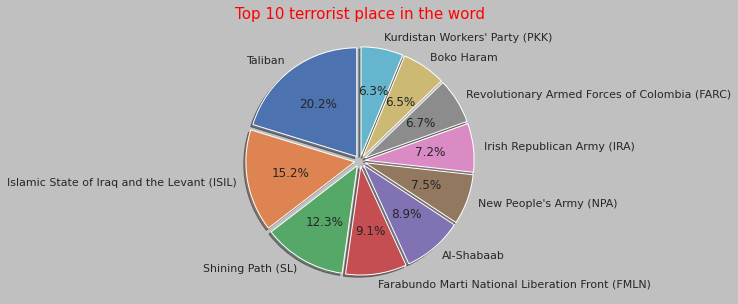

In [ ]:
data_pie = df['gname'].value_counts()[1:11].rename_axis('Terrorist_Region').reset_index(name='gname')
plt.figure(figsize=(10,5), facecolor = 'Silver')
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)  
plt.pie(data_pie.gname, labels=data_pie.Terrorist_Region, startangle=90, autopct= '%.1f%%', shadow =  True, explode = explode)
plt.title('Top 10 terrorist place in the word', fontsize = 15, color = 'Red')
plt.xticks(rotation=90)
plt.show()

## ***Now we will look at trend Before and After the war on terror***

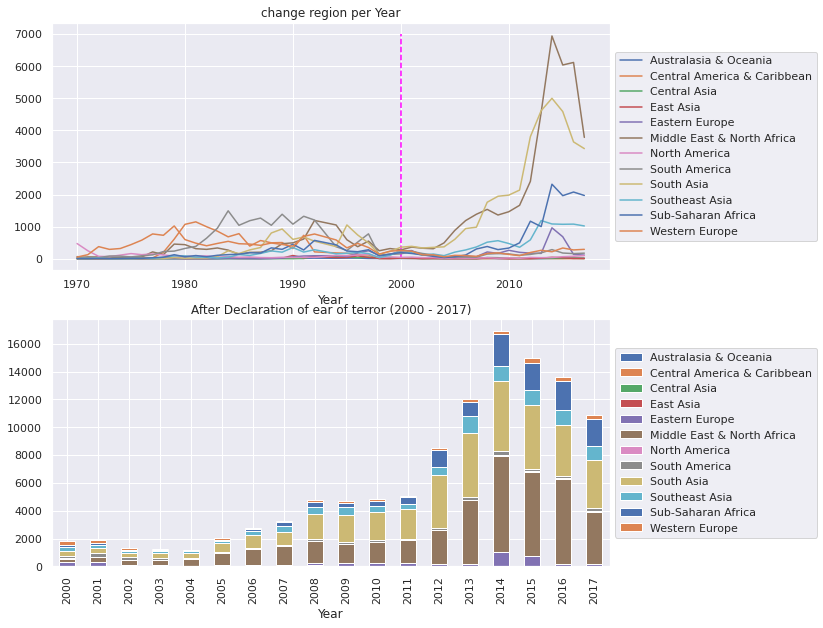

In [ ]:
after = df[df['Year'] >= 2000]
fig,ax = plt.subplots(figsize = (10,10), nrows = 2, ncols = 1)
ax[0] = pd.crosstab(df.Year, df.region_txt).plot(ax=ax[0])
ax[0].set_title('change region per Year')
ax[0].legend(loc='center left', bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2000, ymin = 0, ymax = 7000, color ='magenta', linestyle = '--')
pd.crosstab(after.Year, after.region_txt).plot.bar(stacked = True, ax = ax[1])
ax[1].set_title('After Declaration of ear of terror (2000 - 2017)')
ax[1].legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.show()

From the first plot, we can notice that the terrorism landscape before and after the war of Terror is very different, Before 2000, the region were much closer together in the term of activity, eventually all dropping to the minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with significant increase in Sub_Saharan Africa as well.

# Details from the above EDA (Conclusion):

### *   Attack has increase but the number of people killed most of the times as attck happens.
### *   Iraq has the most terrorist attack region.
### *   The Middle Ease and South Africa Has the most Targeted.
### *   Maximum attack are happened from Bambing/Explosing
### *   2014, 2015, 2016 are the 3 top most terrorist attack years.
### *   Taliban has the highest number of terrorist group.
